<a href="https://colab.research.google.com/github/hypro2/LLM-Multimodal-Colab/blob/main/AI4Chem_ChemLLM_7B_Chat_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U transformers peft accelerate optimum
!pip install --quiet bitsandbytes
!pip install -q einops

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig
import torch

model_name_or_id = "AI4Chem/ChemLLM-7B-Chat"

model = AutoModelForCausalLM.from_pretrained(model_name_or_id, torch_dtype=torch.float16, device_map="auto",trust_remote_code=True, load_in_4bit=True)
tokenizer = AutoTokenizer.from_pretrained(model_name_or_id, trust_remote_code=True)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
model

InternLM2ForCausalLM(
  (model): InternLM2Model(
    (tok_embeddings): Embedding(92544, 4096, padding_idx=2)
    (layers): ModuleList(
      (0-31): 32 x InternLM2DecoderLayer(
        (attention): InternLM2Attention(
          (wqkv): Linear4bit(in_features=4096, out_features=6144, bias=False)
          (wo): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): InternLM2DynamicNTKScalingRotaryEmbedding()
        )
        (feed_forward): InternLM2MLP(
          (w1): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (w3): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (w2): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (attention_norm): InternLM2RMSNorm()
        (ffn_norm): InternLM2RMSNorm()
      )
    )
    (norm): InternLM2RMSNorm()
  )
  (output): Linear(in_features=4096, out_features=92544, bias=False)
)

In [9]:
prompt = "What is Molecule of Ibuprofen?"

inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

generation_config = GenerationConfig(
    do_sample=True,
    top_k=1,
    temperature=0.9,
    max_new_tokens=500,
    repetition_penalty=1.5,
    pad_token_id=tokenizer.eos_token_id
)

outputs = model.generate(**inputs, generation_config=generation_config)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

What is Molecule of Ibuprofen? –
Ibudil (ibubiprofene) belongs to the group called non-steroidal anti-inflammatory drugs. It works by reducing inflammation, pain and fever.
It’s used as a treatment for many conditions including:
• Arthritis: rheumatism or osteoarrthritus; ankylosing spondylitis;
Inflammation caused due t o injuries such sprains etc., headaches,
Dysmenorrhea in women during menstruation period & more…..
How does ibu-din work?
The exact mechanism behind how this drug acts on our body still remains unclear but it seems that its main action lies within prostaglandins which are chemical messengers produced naturally inside cells throughout your entire being from head-toe! They help regulate various functions like blood flow control hormonal balance among others so when there's too much production then you get inflamed tissues along with other symptoms associated therewith!
This medication helps reduce these levels thereby relieving discomforting sensations without affecting

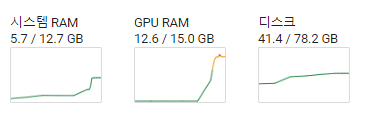

In [2]:
prompt = "What is Molecule of Ibuprofen?"

inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

generation_config = GenerationConfig(
    do_sample=True,
    top_k=1,
    temperature=0.9,
    max_new_tokens=500,
    repetition_penalty=1.5,
    pad_token_id=tokenizer.eos_token_id
)

outputs = model.generate(**inputs, generation_config=generation_config)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:226: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(f'Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.')


What is Molecule of Ibuprofen? –
Ibudilacin (ibufenac) or ibubufenic acid, also known as N-(4-isobutylpheny)-2-methylpropionamide. It’s a non-steroidal anti-inflammatory drug that belongs to the class called acetic acids.
It was first synthesized in Germany by Hoechst AG and marketed under its brand name Motrin from Merck & Co., Inc.. The chemical formula for this compound can be written down using IUPAC nomenclature: C12H16O3N1S; molecular weight =220 g/mol;
Chemical Structure:
The structure consists two parts one part being phenol ring with an alkane chain attached at position four on it while another portion having methoxy group connected via amine linkage between them both resulting into formation molecule named IBUDELIC ACID which has been used widely due their ability not only treat pain but inflammation too without any side effects associated like gastrointestinal bleeding etc…..
How does Medicine work?
Inflammation occurs when there are certain cells present within our body suc

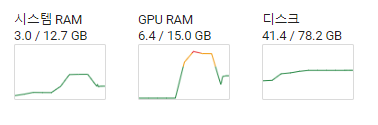